Practical - 1 (Implementing XOR Gate using Backpropagation)

In [ ]:
import numpy as np

# Sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR input and output
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([[0],
              [1],
              [1],
              [0]])

# Initialize weights and biases randomly
np.random.seed(42)
inputLayerNeurons = 2
hiddenLayerNeurons = 2
outputNeurons = 1

# Weights and bias initialization
hidden_weights = np.random.uniform(size=(inputLayerNeurons, hiddenLayerNeurons))
hidden_bias = np.random.uniform(size=(1, hiddenLayerNeurons))
output_weights = np.random.uniform(size=(hiddenLayerNeurons, outputNeurons))
output_bias = np.random.uniform(size=(1, outputNeurons))

# Learning rate
lr = 0.1
epochs = 10000

# Training the neural network
for _ in range(epochs):
    # Forward Propagation
    hidden_layer_input = np.dot(X, hidden_weights) + hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_input)
    final_input = np.dot(hidden_layer_output, output_weights) + output_bias
    final_output = sigmoid(final_input)

    # Backpropagation
    error = y - final_output
    d_output = error * sigmoid_derivative(final_output)

    error_hidden = d_output.dot(output_weights.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    output_weights += hidden_layer_output.T.dot(d_output) * lr
    output_bias += np.sum(d_output, axis=0, keepdims=True) * lr
    hidden_weights += X.T.dot(d_hidden) * lr
    hidden_bias += np.sum(d_hidden, axis=0, keepdims=True) * lr

# Final Output
print("Final Output after training:")
print(np.round(final_output, 3))

Final Output after training:
[[0.053]
 [0.952]
 [0.952]
 [0.052]]


Practical 2 - To explore all deep learning libraries

In [ ]:
import tensorflow as tf
import numpy as np

X = np.array([[0,0], [0,1], [1,0], [1,1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, input_dim=2, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=25, verbose=2)

print("Output:", model.predict(X).round())


Epoch 1/25
1/1 - 1s - 932ms/step - accuracy: 0.5000 - loss: 0.7625
Epoch 2/25
1/1 - 0s - 60ms/step - accuracy: 0.5000 - loss: 0.7621
Epoch 3/25
1/1 - 0s - 41ms/step - accuracy: 0.5000 - loss: 0.7617
Epoch 4/25
1/1 - 0s - 40ms/step - accuracy: 0.5000 - loss: 0.7613
Epoch 5/25
1/1 - 0s - 41ms/step - accuracy: 0.5000 - loss: 0.7609
Epoch 6/25
1/1 - 0s - 61ms/step - accuracy: 0.5000 - loss: 0.7605
Epoch 7/25
1/1 - 0s - 45ms/step - accuracy: 0.5000 - loss: 0.7601
Epoch 8/25
1/1 - 0s - 40ms/step - accuracy: 0.5000 - loss: 0.7597
Epoch 9/25
1/1 - 0s - 42ms/step - accuracy: 0.5000 - loss: 0.7593
Epoch 10/25
1/1 - 0s - 57ms/step - accuracy: 0.5000 - loss: 0.7589
Epoch 11/25
1/1 - 0s - 59ms/step - accuracy: 0.5000 - loss: 0.7585
Epoch 12/25
1/1 - 0s - 45ms/step - accuracy: 0.5000 - loss: 0.7581
Epoch 13/25
1/1 - 0s - 40ms/step - accuracy: 0.5000 - loss: 0.7577
Epoch 14/25
1/1 - 0s - 40ms/step - accuracy: 0.5000 - loss: 0.7573
Epoch 15/25
1/1 - 0s - 59ms/step - accuracy: 0.5000 - loss: 0.7570
Epo

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# XOR Input and Output
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Build the model
model = Sequential()
model.add(Dense(2, input_dim=2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=100, verbose=0)

# Predict
output = model.predict(X)
print("Output:\n", np.round(output))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Output:
 [[0.]
 [1.]
 [0.]
 [1.]]


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# XOR Input and Output
X = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float32)
y = torch.tensor([[0],[1],[1],[0]], dtype=torch.float32)

# Model definition
model = nn.Sequential(
    nn.Linear(2, 2),
    nn.Sigmoid(),
    nn.Linear(2, 1),
    nn.Sigmoid()
)

# Loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

# Training loop
for epoch in range(5000):
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

# Final Output
print("Output:", torch.round(model(X)))


Output: tensor([[0.],
        [0.],
        [1.],
        [1.]], grad_fn=<RoundBackward0>)


Practical 3 - Design and implement mobile price range calculator

In [ ]:
# STEP 1: Upload your train.csv from Downloads
from google.colab import files
uploaded = files.upload()  # Select your train.csv

# STEP 2: Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# STEP 3: Load and prepare the dataset
df = pd.read_csv("train.csv")  # Make sure it's named exactly this

# Features and target
X = df.drop("price_range", axis=1)
y = df["price_range"]

# One-hot encode the target (for softmax classification)
y = to_categorical(y, num_classes=4)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# STEP 4: Build the neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')  # 4 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# STEP 5: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n Test Accuracy: {accuracy * 100:.2f}%")


Saving train.csv to train.csv


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2950 - loss: 1.4496 - val_accuracy: 0.4125 - val_loss: 1.2863
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4830 - loss: 1.2171 - val_accuracy: 0.5469 - val_loss: 1.0892
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6226 - loss: 0.9958 - val_accuracy: 0.6406 - val_loss: 0.8752
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6902 - loss: 0.8033 - val_accuracy: 0.7031 - val_loss: 0.7212
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8007 - loss: 0.6263 - val_accuracy: 0.7563 - val_loss: 0.6046
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8599 - loss: 0.5235 - val_accuracy: 0.8250 - val_loss: 0.5154
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9105 - loss: 0.4269 - val_accuracy: 0.8344 - val_loss: 0.4556
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9245 - loss: 0.3497 - val_accuracy: 0.8813 - val_loss

Practical 4 - Implement CNN for multiclass object classification

Epoch 1/3
79/79 - 11s - 141ms/step - accuracy: 0.2088 - loss: 2.1288 - val_accuracy: 0.2988 - val_loss: 1.9147
Epoch 2/3
79/79 - 7s - 92ms/step - accuracy: 0.3636 - loss: 1.7819 - val_accuracy: 0.3306 - val_loss: 1.8119
Epoch 3/3
79/79 - 10s - 130ms/step - accuracy: 0.4126 - loss: 1.6230 - val_accuracy: 0.3883 - val_loss: 1.6628

 Test Accuracy: 38.83%


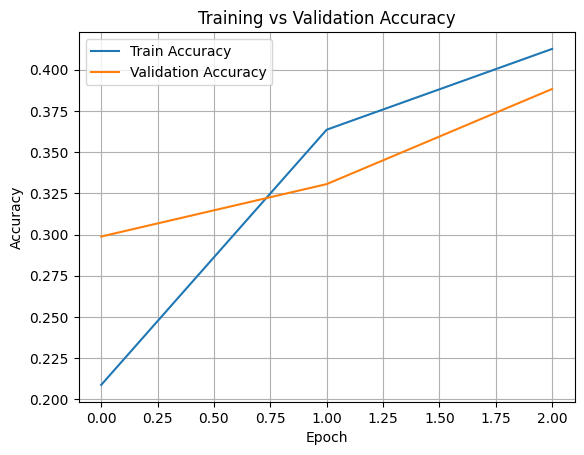

In [ ]:
# STEP 2: Import libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
# STEP 3: Load and preprocess CIFAR-10
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

#  Use only 5,000 training samples for speed
X_train, y_train = X_train[:5000], y_train[:5000]

# Normalize pixel values
X_train, X_test = X_train / 255.0, X_test / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
# STEP 4: Build a small CNN model
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 classes
# STEP 5: Compile and train the model (only 3 epochs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=3,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=2
)
# STEP 6: Evaluate and plot results
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n Test Accuracy: {test_acc * 100:.2f}%")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Practical 5 - Implement transferred learning

In [ ]:
# STEP 2: Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
# STEP 3: Load and Preprocess Dataset (Limited to 5,000 Samples)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#  Use only 5,000 samples to reduce load time
x_train, y_train = x_train[:5000], y_train[:5000]

# Resize images from 32x32 to 96x96
x_train = tf.image.resize(x_train, (96, 96)) / 255.0
x_test = tf.image.resize(x_test, (96, 96)) / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
# STEP 4: Load Pretrained MobileNetV2
base_model = MobileNetV2(
    input_shape=(96, 96, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base layers
# STEP 5: Add Custom Layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])
# STEP 6: Compile and Train (Only 3 Epochs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(
    x_train, y_train,
    epochs=3,                #  Reduced epochs
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=2
)


Epoch 1/3
79/79 - 108s - 1s/step - accuracy: 0.4916 - loss: 1.4720 - val_accuracy: 0.6941 - val_loss: 0.9080
Epoch 2/3
79/79 - 155s - 2s/step - accuracy: 0.6858 - loss: 0.9240 - val_accuracy: 0.7320 - val_loss: 0.7865
Epoch 3/3
79/79 - 143s - 2s/step - accuracy: 0.7262 - loss: 0.8000 - val_accuracy: 0.7450 - val_loss: 0.7429
